Consignes Projet 4
Anticipez les besoins en consommation électrique de bâtiments

Lien vers consignes : https://openclassrooms.com/fr/projects/629/assignment
Lien vers données : https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv
Lien vers score Star Energy : https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what

Lien vers la signification des colonnes (trouvé via recherche web) : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

In [208]:
# import des bibliothèques utilisées
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

In [209]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

<ipython-input-209-358864a12876>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [210]:
data_2015=pd.read_csv("C:/Users/maido/Desktop/CentralSuplec/P4_energy_score/2015-building-energy-benchmarking.csv")
data_2016=pd.read_csv("C:/Users/maido/Desktop/CentralSuplec/P4_energy_score/2016-building-energy-benchmarking.csv")

In [211]:
data_2015.shape

(3340, 42)

In [212]:
data_2016.shape

(3376, 46)

In [213]:
# merger les deux table ou concatenate ? merger selon le code building ? 
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'human_address': '{""address"":""405 OLIVE WAY"",""city"":""SEATTLE"",""state"":""WA"",""zip"":""98101""}', 'latitude': '47.61219025', 'needs_recoding': False, 'longitude': '-122.33799744'}",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'human_address': '{""address"":""724 PINE ST"",""city"":""SEATTLE"",""state"":""WA"",""zip"":""98101""}', 'latitude': '47.61310583', 'needs_recoding': False, 'longitude': '-122.33335756'}",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'human_address': '{""address"":""1900 5TH AVE"",""city"":""SEATTLE"",""state"":""WA"",""zip"":""98101""}', 'latitude': '47.61334897', 'needs_recoding': False, 'longitude': '-122.33769944'}",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'human_address': '{""address"":""620 STEWART ST"",""city"":""SEATTLE"",""state"":""WA"",""zip"":""98101""}', 'latitude': '47.61421585', 'needs_recoding': False, 'longitude': '-122.33660889'}",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'human_address': '{""address"":""401 LENORA ST"",""city"":""SEATTLE"",""state"":""WA"",""zip"":""98121""}', 'latitude': '47.6137544', 'needs_recoding': False, 'longitude': '-122.3409238'}",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN


In [214]:
data_2015.info() # 42 colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   OSEBuildingID                      3340 non-null   int64  
 1   DataYear                           3340 non-null   int64  
 2   BuildingType                       3340 non-null   object 
 3   PrimaryPropertyType                3340 non-null   object 
 4   PropertyName                       3340 non-null   object 
 5   TaxParcelIdentificationNumber      3338 non-null   object 
 6   Location                           3340 non-null   object 
 7   CouncilDistrictCode                3340 non-null   int64  
 8   Neighborhood                       3340 non-null   object 
 9   YearBuilt                          3340 non-null   int64  
 10  NumberofBuildings                  3340 non-null   int64  
 11  NumberofFloors                     3332 non-null   float

### Suppression des valuers nan > 0.8 

In [215]:
nan_nb=data_2015.isna().mean()
nan_nb2=data_2016.isna().mean()
#data_2015.drop(nan_nb.index]
data_2015.drop(nan_nb[nan_nb>0.8].index.to_list(),axis=1,inplace=True)
data_2016.drop(nan_nb2[nan_nb2>0.8].index.to_list(),axis=1,inplace=True)

In [216]:
data_2015["Location"]
#liste_mots = [str(i).split('""', 1)[0] for i in data[colonne].dropna().tolist()]

0       {'human_address': '{"address":"405 OLIVE WAY","city":"SEATTLE","state":"WA","zip":"98101"}', 'latitude': '47.61219025', 'needs_recoding': False, 'longitude': '-122.33799744'}  
1       {'human_address': '{"address":"724 PINE ST","city":"SEATTLE","state":"WA","zip":"98101"}', 'latitude': '47.61310583', 'needs_recoding': False, 'longitude': '-122.33335756'}    
2       {'human_address': '{"address":"1900 5TH AVE","city":"SEATTLE","state":"WA","zip":"98101"}', 'latitude': '47.61334897', 'needs_recoding': False, 'longitude': '-122.33769944'}   
3       {'human_address': '{"address":"620 STEWART ST","city":"SEATTLE","state":"WA","zip":"98101"}', 'latitude': '47.61421585', 'needs_recoding': False, 'longitude': '-122.33660889'} 
4       {'human_address': '{"address":"401 LENORA ST","city":"SEATTLE","state":"WA","zip":"98121"}', 'latitude': '47.6137544', 'needs_recoding': False, 'longitude': '-122.3409238'}    
                                                                           

In [217]:
import ast
import json
from pandas.io.json import json_normalize   

location = pd.DataFrame()
for line, building_id in list(zip(data_2015['Location'], data_2015['OSEBuildingID'])):
    line = ast.literal_eval(line) # constract an object from string 
    line = json_normalize(line)
        
latitude = line['latitude'][0]
longitude = line['longitude'][0]

line = pd.DataFrame(ast.literal_eval(line['human_address'][0]), index=[0])
location = pd.concat([location,
                             pd.DataFrame({
                       'Building_id' : building_id,
                       'Address' : line['address'][0],
                       'City' : line['city'][0],
                       'State' : line['state'][0],
                       'ZipCode' : line['zip'][0],
                       'Latitude' : latitude,
                       'Longitude': longitude }, index=[0])],
                             axis=0)
data_2015=pd.merge(data_2015, location, left_on = 'OSEBuildingID', right_on = 'Building_id').drop(['Building_id','Location'],axis=1)

#data_2015=transform_columns(data_2015)

<ipython-input-217-46f695023026>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  line = json_normalize(line)


In [218]:
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude
0,50059,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG B,6392001040,4,NORTHEAST,1981,1,4.0,53100,0,53100,Multifamily Housing,Multifamily Housing,25265.0,NaN,NaN,24.0,38.2,41.7,120.1,130.9,966376.0,1053118.0,0.0,283229.0,966416.0,0.0,0.0,0.0,6.74,0.05,No,Compliant,7540 37TH AVE NE,SEATTLE,WA,98115,47.68396954,-122.2874088


In [219]:
print('colonne dans 2015 et pas 2016',set(data_2015.columns)-set(data_2016.columns)) # 
print('colonnes dans 2016 et pas dans 2015',set(data_2016.columns)-set(data_2015.columns)) # dans 2016 et pas dans 2015

colonne dans 2015 et pas 2016 {'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)'}
colonnes dans 2016 et pas dans 2015 {'GHGEmissionsIntensity', 'TotalGHGEmissions'}


### Exploration des variables de difference entre les deux Data 

In [220]:
data_2015.columns[data_2015.columns.str.contains('GHG')]

Index(['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)'], dtype='object')

In [221]:
data_2015.shape

(1, 42)

In [222]:
#import ast 
#dictio= ast.literal_eval("{'a':1,'b':2}")
#type(dictio)
data_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()
# que GHGEmissions(MetricTonsCO2e).

count    1.00
mean     0.05
std     NaN  
min      0.05
25%      0.05
50%      0.05
75%      0.05
max      0.05
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [223]:
#list(zip(data_2015['Location'], data_2015['OSEBuildingID']))
#data_2015
data_2015['GHGEmissions(MetricTonsCO2e)'].describe()

count    1.00
mean     6.74
std     NaN  
min      6.74
25%      6.74
50%      6.74
75%      6.74
max      6.74
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [224]:
#import ast 
#lacation=data_2016
#data_2015['OSEBuildingID']
#line, building_id 
#print(list(zip(data_2015['Location'],data_2015['OSEBuildingID']) ) )
#ast.literal_eval(zip(data_2015['Location'],data_2015['OSEBuildingID']))
data_2016['TotalGHGEmissions'].describe() 

count    3367.000000 
mean     119.723971  
std      538.832227  
min     -0.800000    
25%      9.495000    
50%      33.920000   
75%      93.940000   
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [225]:
data_2016['GHGEmissionsIntensity'].describe() 

count    3367.000000
mean     1.175916   
std      1.821452   
min     -0.020000   
25%      0.210000   
50%      0.610000   
75%      1.370000   
max      34.090000  
Name: GHGEmissionsIntensity, dtype: float64

TotalGHGEmissions: The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. 

### changement des libelés des variables pour une post uniformalisation

In [226]:
data_2015['TotalGHGEmissions'] = data_2015['GHGEmissions(MetricTonsCO2e)']
data_2015['GHGEmissionsIntensity'] = data_2015['GHGEmissionsIntensity(kgCO2e/ft2)']
data_2015.drop(['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)'], axis=1, inplace=True)

In [227]:
# merger les deux dataframe 
print('colonnes présentes sur données 2015 et absentes sur 2016 : \n', set(data_2015.columns) - set(data_2016.columns))
print('\ncolonnes présentes sur données 2016 et absentes sur 2015 : \n', set(data_2016.columns) - set(data_2015.columns))

colonnes présentes sur données 2015 et absentes sur 2016 : 
 {'OtherFuelUse(kBtu)'}

colonnes présentes sur données 2016 et absentes sur 2015 : 
 set()


In [228]:
data_2015['OtherFuelUse(kBtu)'].describe() # obsolete comme variable BCP DE à n est clair en terme 

count    1.0
mean     0.0
std     NaN 
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: OtherFuelUse(kBtu), dtype: float64

In [229]:
data_2015.drop('OtherFuelUse(kBtu)',axis=1,inplace=True)

In [230]:
pd.DataFrame([data_2015.dtypes, data_2016.dtypes])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
0,int64,int64,object,object,object,object,int64,object,int64,int64,float64,int64,int64,int64,object,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,float64,float64
1,int64,int64,object,object,object,object,int64,object,int64,float64,int64,int64,int64,int64,object,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,object,object,object,object,float64,float64,float64,float64,float64


In [231]:
# concatenate les datas: 
data = pd.concat([data_2015, data_2016], axis=0, sort=False) # SiteEnergyUseWN(kBtu) un important variable explicatif 

In [232]:
data.shape

(3377, 41)

Description des variables utilisation d'energy

In [233]:
data['SiteEUI(kBtu/sf)'].describe()

count    3370.000000
mean     54.727211  
std      56.265493  
min      0.000000   
25%      27.900000  
50%      38.599998  
75%      60.400002  
max      834.400024 
Name: SiteEUI(kBtu/sf), dtype: float64

In [234]:
data['SiteEUIWN(kBtu/sf)'].describe()

count    3371.000000
mean     57.029249  
std      57.155459  
min      0.000000   
25%      29.400000  
50%      40.900002  
75%      64.250000  
max      834.400024 
Name: SiteEUIWN(kBtu/sf), dtype: float64

In [235]:
data['SourceEUI(kBtu/sf)'].describe()


count    3368.000000
mean     134.228652 
std      139.267081 
min      0.000000   
25%      74.699997  
50%      96.199997  
75%      143.899994 
max      2620.000000
Name: SourceEUI(kBtu/sf), dtype: float64

In [236]:
data['SourceEUIWN(kBtu/sf)'].describe()


count    3368.000000
mean     137.781888 
std      139.089198 
min     -2.100000   
25%      78.400002  
50%      101.099998 
75%      148.325001 
max      2620.000000
Name: SourceEUIWN(kBtu/sf), dtype: float64

In [237]:
data['SiteEnergyUseWN(kBtu)'].describe()

count    3.371000e+03
mean     5.275473e+06
std      1.593659e+07
min      0.000000e+00
25%      9.705048e+05
50%      1.904056e+06
75%      4.381179e+06
max      4.716139e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [238]:
### Valeurs des nan dans le nouvelle data set ['SiteEUI(kBtu/sf)','SiteEnergyUseWN(kBtu)','SourceEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)']

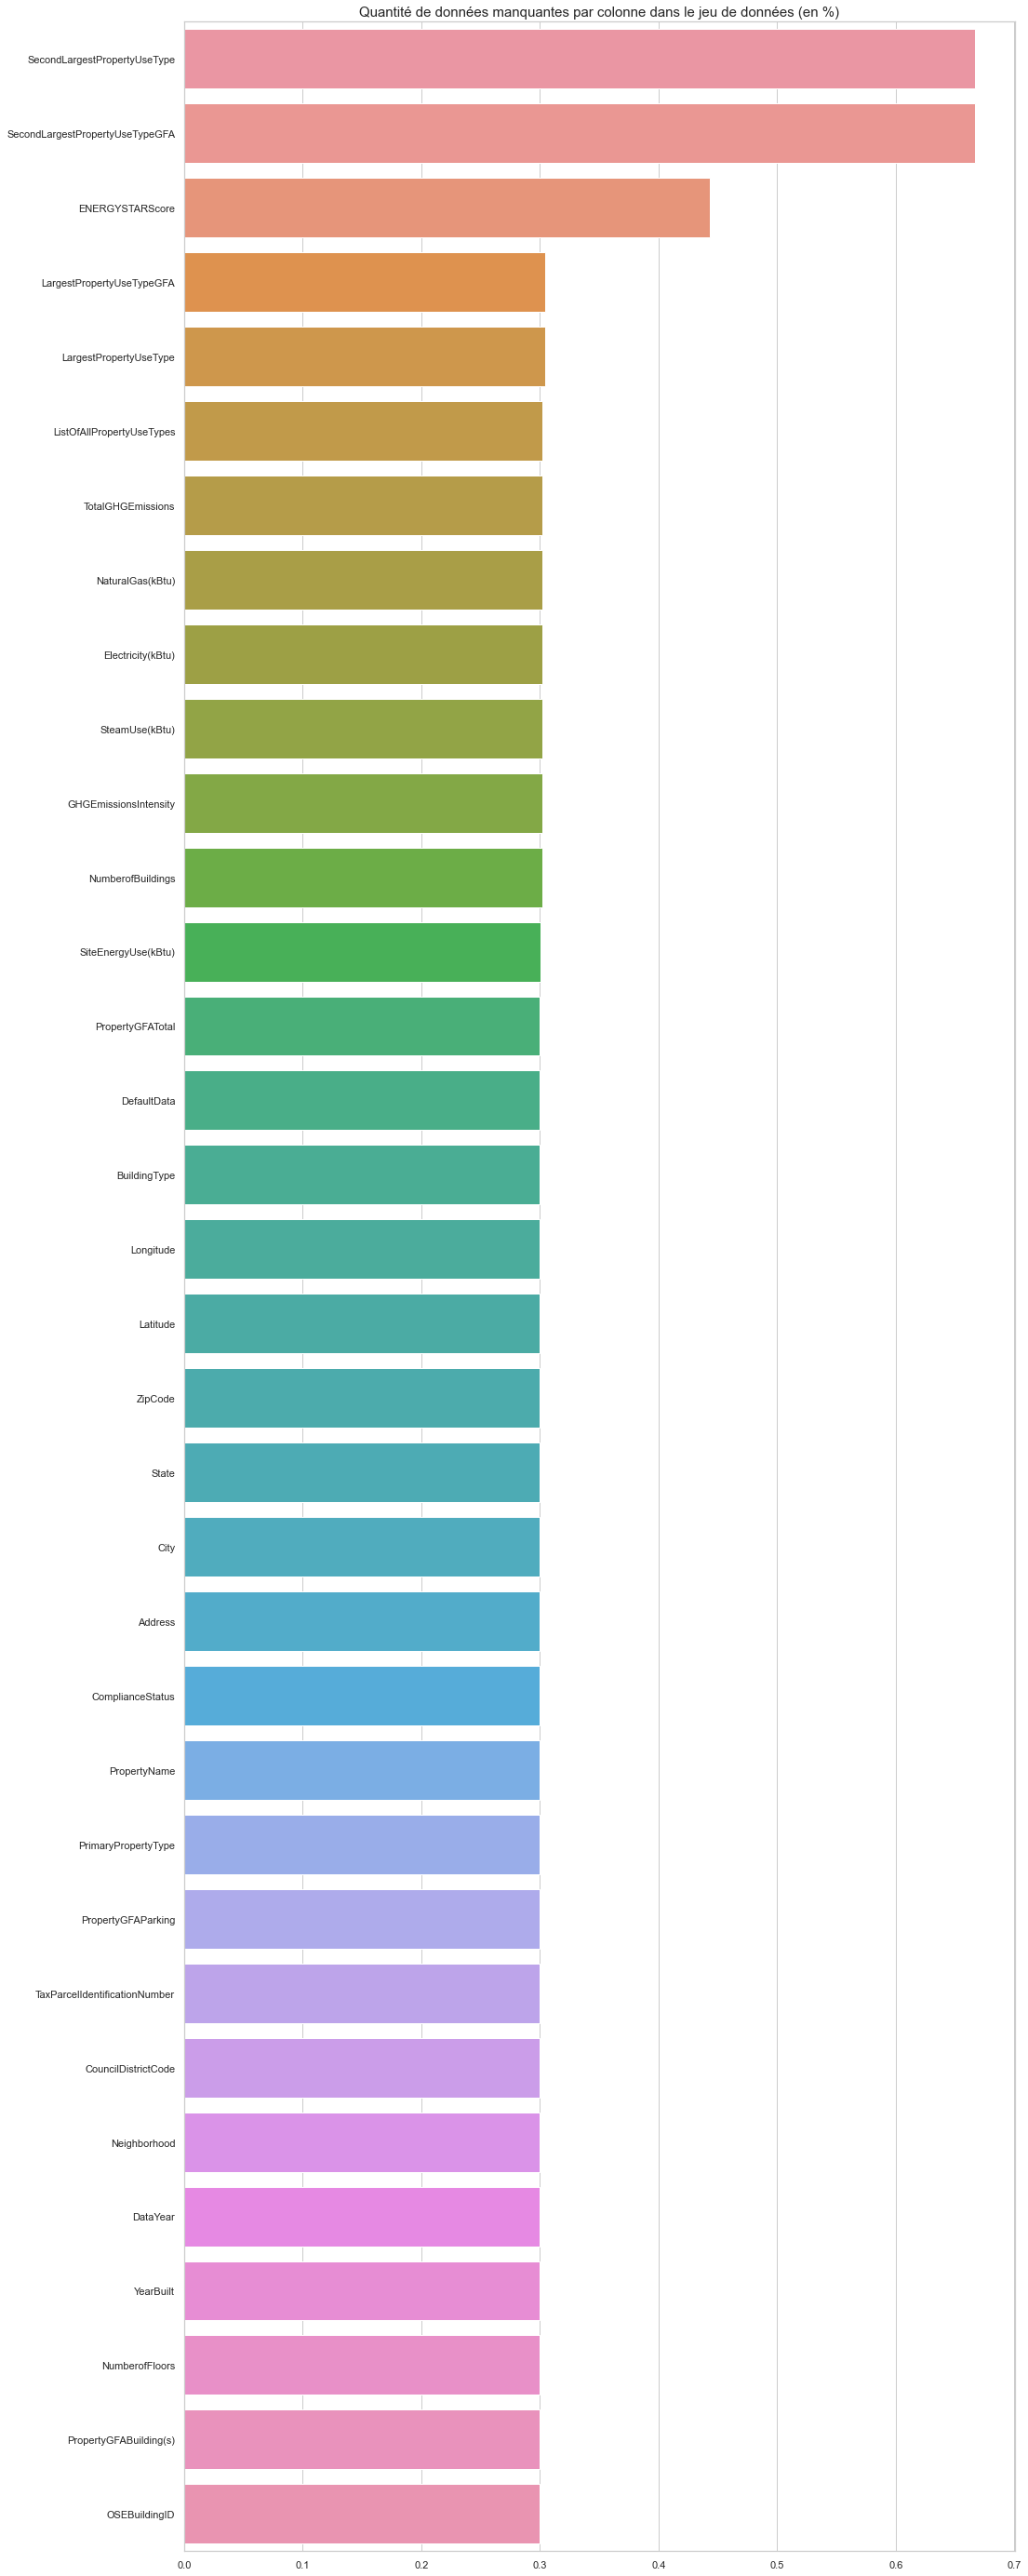

In [288]:
proportion_nan_ = data .isna().mean().sort_values(ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(16, 50))
ax = sns.barplot(y = proportion_nan_.index, x=proportion_nan_.values)
#ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

### Suppresion des outliers 

In [289]:
# analyse des outliers 
float_data=data.select_dtypes(include=["float64","int64"]).columns
def outliers_percentile(data_frame):
    #for column in data_frame.select_dtypes(include=['int32','float64'])
    for column in float_data: # supprimer les outlier selon les centiles 
        data_frame.loc[data_frame[column]>data_frame[column].quantile(0.995)]=np.nan
        data_frame.loc[data_frame[column] <data_frame[column].quantile(0.005)]=np.nan
        #data_frame.loc[data_[column] < 0]=np.nan
    return data_frame
data_= outliers_percentile(data)

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution après')

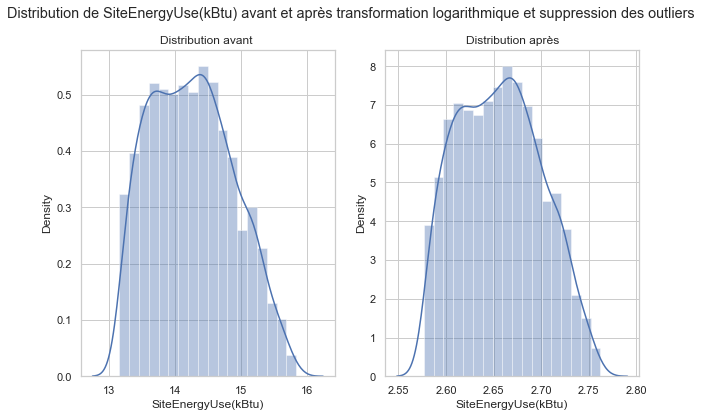

In [290]:
f, axes = plt.subplots(1,2, figsize=(10,6)) 
f.suptitle("Distribution de SiteEnergyUse(kBtu) avant et après transformation logarithmique et suppression des outliers")

ax1 = sns.distplot(data["SiteEnergyUse(kBtu)"].dropna(), ax=axes[0])
ax1.set_title("Distribution avant ")
#ax1.set_xlim(0, 15)

data_["SiteEnergyUse(kBtu)"]= np.log(data["SiteEnergyUse(kBtu)"])
ax2 = sns.distplot(data_["SiteEnergyUse(kBtu)"].dropna(), ax=axes[1])
ax2.set_title("Distribution après")
# pas besoin de transformation logarithmique

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Méthode par percentiles')

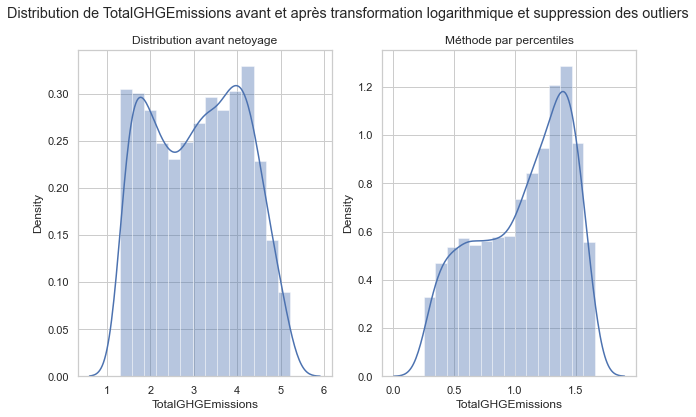

In [291]:
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de TotalGHGEmissions avant et après transformation logarithmique et suppression des outliers")

ax1 = sns.distplot(data["TotalGHGEmissions"].dropna(), ax=axes[0])
ax1.set_title("Distribution avant netoyage")
#ax1.set_xlim(0, 15)
data_["TotalGHGEmissions"]= np.log(data["TotalGHGEmissions"]) # le choix de cette variable comme variable cible 1 

ax2 = sns.distplot(data_["TotalGHGEmissions"].dropna(), ax=axes[1])
ax2.set_title("Méthode par percentiles")

### Analyse univarié Matrice des corrélation. 

<ipython-input-292-5cfd55c73c2b>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


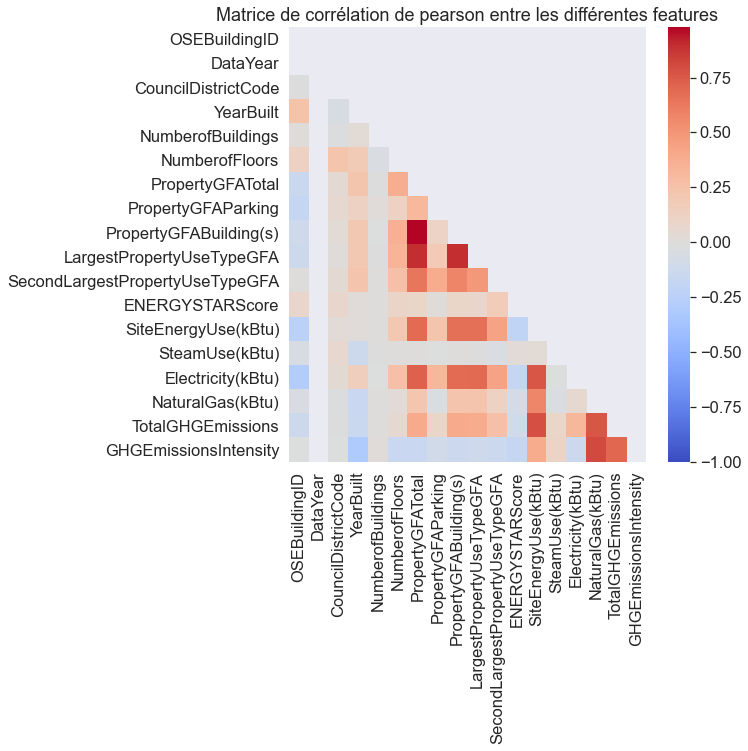

In [292]:
corr= data_.corr()
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation de pearson entre les différentes features')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()
#sns.set(font_scale=1)

 On remarque déja une correlation entre les variable cible TotalGHGEmissions a une forte correlation avec SiteEnergyUse(kBtu) SiteEUI(kBtu/sf) NaturalGas(kBtu)

Points Majeurs:
Consommation: Corrélation importante de la avec:
•PropertyGFATotal,
•PropertyGFABuilding,
•LargestPropertyUseTypeFGA
•SiteEUI(kBtu/sf) et les variables de consommation
Emissions: Mêmes corrélations (dans moindre mesure) + corrélation importante avec la consommation*

Autres points notables:
•Corrélation importante entre
•PropertyGFATotal et PropertyGFABuildings
•PropertyFGATotal et LargestPropertyUseTypeGFA
•LargestPropertyUseTypeGFA et PropertyFGABuilding(s)
•Energy Star Score : pas de corrélation notable

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


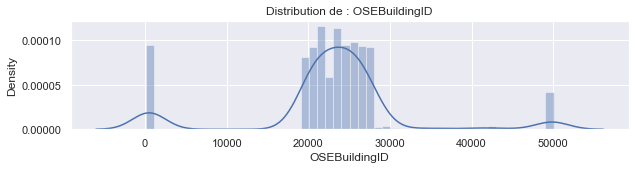

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


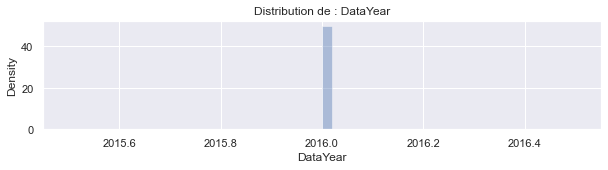

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


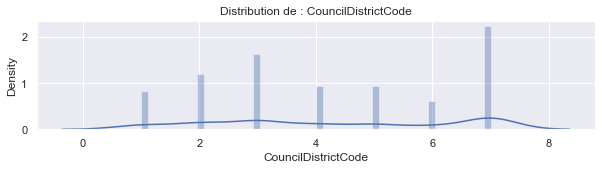

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


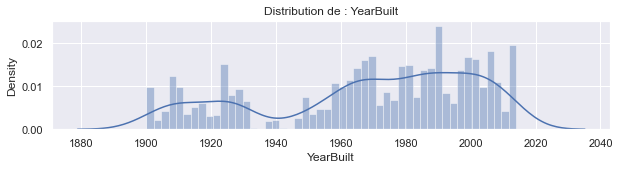

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


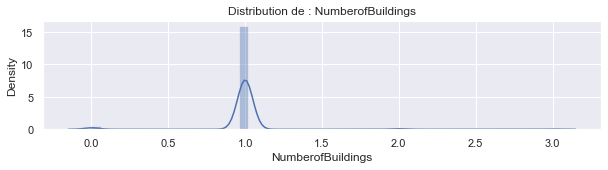

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


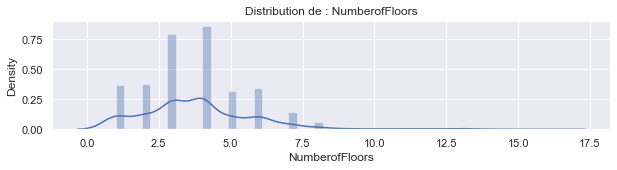

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


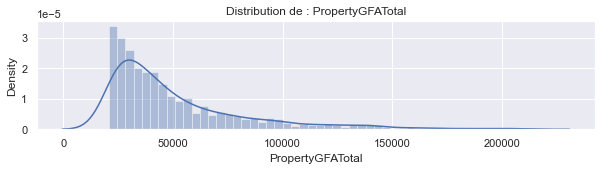

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


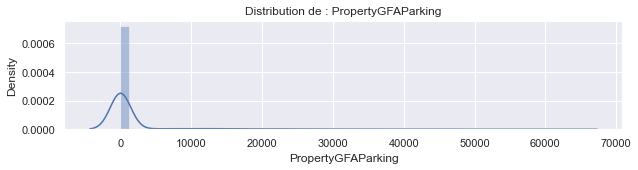

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


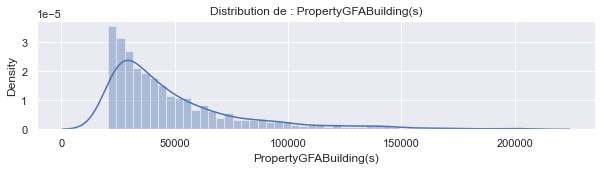

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


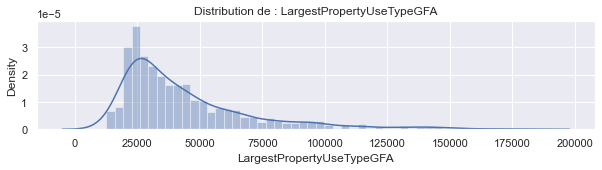

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


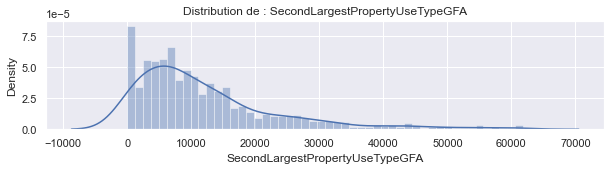

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


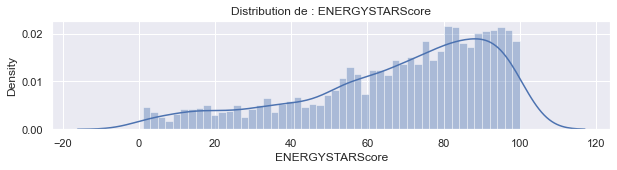

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


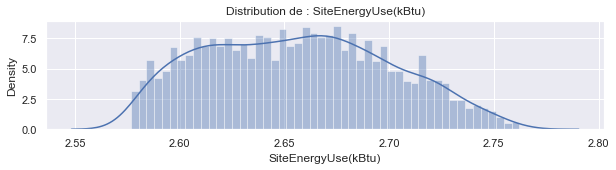

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


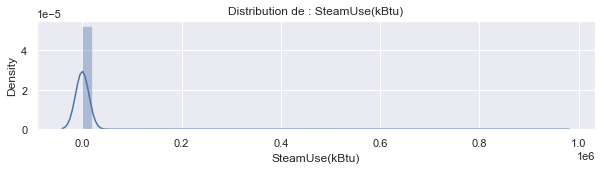

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


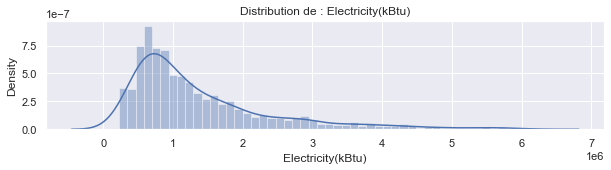

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


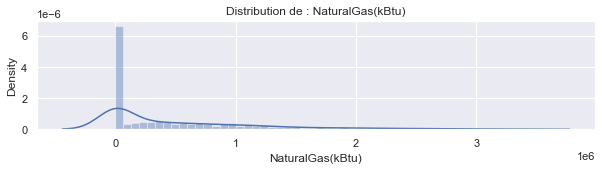

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


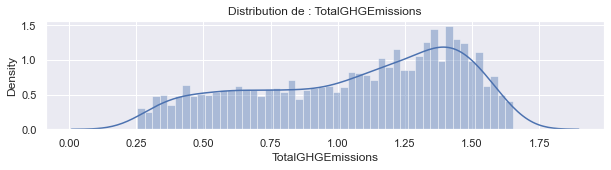

C:\Users\maido\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


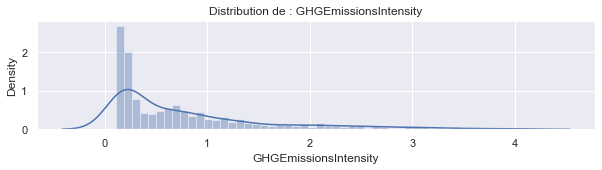

In [293]:
for column in float_data:
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(data[column], bins=50) 
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

### Preparation des vecteurs et matrices 

Suppression des identifiants des batimants 

In [294]:
data_ = data_.drop(['OSEBuildingID', 'TaxParcelIdentificationNumber'], axis=1)  

Explorration des variables de consommation

In [295]:
corr= data[['Electricity(kWh)','SiteEUI(kBtu/sf)','SiteEnergyUseWN(kBtu)','SourceEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)']].corr()

plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation de pearson entre les différentes features')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()

KeyError: "None of [Index(['Electricity(kWh)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUseWN(kBtu)',\n       'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)'],\n      dtype='object')] are in the [columns]"

Suppression des variables de consommations 

In [ ]:
data_.drop(['Electricity(kWh)','SiteEUI(kBtu/sf)','SiteEnergyUseWN(kBtu)','SourceEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)'],axis=1,inplace=True)
# supprimer NaturalGas(therms) et garder NaturalGas(Kbtu) 
data_.drop('NaturalGas(therms)', inplace=True, axis=1)

In [297]:
obj_col=data_.select_dtypes(include=["object"]).columns
float_data=data_.select_dtypes(include=["float64","int64"]).columns
for col in obj_col:
    print(col)
    print( data[col].nunique())

BuildingType
7
PrimaryPropertyType
22
PropertyName
2116
Neighborhood
18
ListOfAllPropertyUseTypes
246
LargestPropertyUseType
43
SecondLargestPropertyUseType
38
DefaultData
2
ComplianceStatus
3
Address
2112
City
1
State
1
ZipCode
41
Latitude
1911
Longitude
1819


Analyse Multivariée entre type de batimant et son utilisation variable gatégorielle. Maintenant reperer les variables categorielle et encoder 

In [298]:
data_['PrimaryPropertyType'].unique() # ca sert a rien seattle city
data_['PrimaryPropertyType'].value_counts()
data_.groupby(['BuildingType']).count()[['PrimaryPropertyType']]
# tableau pivo 
table=pd.pivot_table(data_,index=['Neighborhood'],columns=['BuildingType'],aggfunc={'TotalGHGEmissions':np.sum},dropna=True)#fill_value=np.mean(data_['TotalGHGEmissions']))
#table.plot(kind='bar')
table

TotalGHGEmissions                       \
BuildingType                     Campus Multifamily HR (10+)   
Neighborhood                                                   
BALLARD               NaN               NaN                    
Ballard               NaN               NaN                    
CENTRAL                2.949110          2.598097              
Central               NaN               NaN                    
DELRIDGE              NaN               NaN                    
DOWNTOWN               2.708528          26.536135             
Delridge              NaN               NaN                    
EAST                   1.472275          11.448568             
GREATER DUWAMISH      NaN                1.452230              
LAKE UNION            NaN               NaN                    
MAGNOLIA / QUEEN ANNE NaN                1.886907              
NORTH                 NaN               NaN                    
NORTHEAST             NaN                2.464632              
NORTHWEST             NaN                2.665474              
North                 NaN               NaN                    
Northwest             NaN               NaN                    
SOUTHEAST             NaN               NaN                    
SOUTHWEST             NaN               NaN                    

                                                                 \
BuildingType          Multifamily LR (1-4) Multifamily MR (5-9)   
Neighborhood                                                      
BALLARD                19.048292            20.450731             
Ballard                1.144720            NaN                    
CENTRAL                27.515522            17.841608             
Central                14.309585            4.063632              
DELRIDGE               22.831841            6.584590              
DOWNTOWN               39.366477            108.742138            
Delridge              NaN                  NaN                    
EAST                   150.239052           127.151239            
GREATER DUWAMISH       24.948011            2.279731              
LAKE UNION             39.938351            34.744381             
MAGNOLIA / QUEEN ANNE  127.442044           73.215197             
NORTH                  43.398865            16.312845             
NORTHEAST              58.897905            42.090102             
NORTHWEST              63.450719            11.277600             
North                  23.236568            4.449599              
Northwest              3.582993            NaN                    
SOUTHEAST              27.167410            6.250381              
SOUTHWEST              44.436445            43.390336             

                                                                           
BuildingType          NonResidential Nonresidential COS SPS-District K-12  
Neighborhood                                                               
BALLARD                32.833689      1.393718           3.650993          
Ballard                1.241023      NaN                 0.857019          
CENTRAL                27.080453     NaN                 3.786677          
Central                3.031303      NaN                NaN                
DELRIDGE               23.507834      3.080002           5.092447          
DOWNTOWN               151.932454     3.776950          NaN                
Delridge               2.611898      NaN                NaN                
EAST                   55.681855      3.014260           5.673418          
GREATER DUWAMISH       218.845753     7.273306           10.764154         
LAKE UNION             70.488873     NaN                 4.251339          
MAGNOLIA / QUEEN ANNE  71.905777      5.350835           4.039570          
NORTH                  27.973289      3.411970           4.106262          
NORTHEAST              62.223004      1.422294           8.447538          
NORTHWEST              35.591928      2.095101       

In [299]:
y_columns = ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']
y = data_[y_columns]
X = data_[float_data].drop(y_columns, axis=1)
# numeric colonnes 

for col in X.columns:
    X[col].fillna(np.mean(X[col]),inplace=True)

for col in y.columns:
    y[col].fillna(np.mean(y[col]),inplace=True)  

# les colonnes objets  

encoder=LabelEncoder()
X['PrimaryPropertyType']=encoder.fit_transform(data_['PrimaryPropertyType'])
X['BuildingType']=encoder.fit_transform(data_['BuildingType'])
X['Neighborhood']=encoder.fit_transform(data_['Neighborhood'])

#X.fillna(0,inplace=True)
#y.fillna(0,inplace=True)

C:\Users\maido\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


 ### Implementaion Regression lineaire simple avec Energystarscore

In [250]:
X['ENERGYSTARScore'].describe() #in [1,100]

count    3377.000000
mean     68.519213  
std      20.886767  
min      1.000000   
25%      67.000000  
50%      68.519213  
75%      82.000000  
max      100.000000 
Name: ENERGYSTARScore, dtype: float64

 ### Implementaion Regression lineaire simple avec  Energystarscore


In [251]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
for column in y_columns:
    X_train, X_test, y_train, y_test = train_test_split(X, y[column], test_size=0.2)   #  stratify=data['DataYear']
    model=LinearRegression()
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print('Méthode: LinearRegression ')
    print('+ utilisation de pipelines')
    print('Prédiction de ',column)
    #print('score d\'entrainement = ',model.score(X_train,y_train))
    print("score de la prédiction: ",  model.score(X_test, y_test))
    print("MAE = ",mean_absolute_error(y_test,y_pred)) 
    print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("median abs err = ",median_absolute_error( y_test,y_pred) )
    print('')
    #plt.plot(y_test,y_pred,'.')
    # ameliorer categoriel

Méthode: LinearRegression 
+ utilisation de pipelines
Prédiction de  TotalGHGEmissions
score de la prédiction:  0.8255011439128995
MAE =  0.3763135899482218
RMSE =  0.4755821092978739
median abs err =  0.3433023377996931

Méthode: LinearRegression 
+ utilisation de pipelines
Prédiction de  SiteEnergyUse(kBtu)
score de la prédiction:  0.8505601192941594
MAE =  0.22039800133455292
RMSE =  0.2913525948835785
median abs err =  0.17581185920786346



Un très bon score R^2 avec une regression lineaire simple 

 ### Implementaion Regression lineaire simple sans  Energystarscore

In [252]:
X_=X.drop('ENERGYSTARScore', axis=1)
for column in y_columns:
    X_train, X_test, y_train, y_test = train_test_split(X_, y[column], test_size=0.2)   #  stratify=data['DataYear']
    model=LinearRegression()
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print('Méthode: LinearRegression ')
    print('+ utilisation de pipelines')
    print('Prédiction de ',column)
    #print('score d\'entrainement = ',model.score(X_train,y_train))
    print("score de la prédiction: ",  model.score(X_test, y_test))
    print("MAE = ",mean_absolute_error(y_test,y_pred))
    print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("median abs err = ",median_absolute_error(y_test,y_pred))
    print('')

Méthode: LinearRegression 
+ utilisation de pipelines
Prédiction de  TotalGHGEmissions
score de la prédiction:  0.7904250935017277
MAE =  0.3881322316974093
RMSE =  0.5031948910288865
median abs err =  0.340908261028664

Méthode: LinearRegression 
+ utilisation de pipelines
Prédiction de  SiteEnergyUse(kBtu)
score de la prédiction:  0.8589268464395021
MAE =  0.22040565643242493
RMSE =  0.29618740668222615
median abs err =  0.17728257829956906



- Une legere augmentation de la RMSE pour la prediction de la TotalGHGEmissions et SiteEnergyUse sans Energy Star Score.  
Conclusion: Energy Star Score impacte legerement la prédiction de l'utilisation d'energie SiteEnergyUse(kBtu)

In [254]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import * 

for column in y_columns:
    X_train, X_test, y_train, y_test = train_test_split(X, y[column], test_size=0.2)  
    n_alphas = 20 # c'est bcp 200 
    params={'alpha':np.logspace(-3, 3, 7)  ,'l1_ratio': np.logspace(-3, 3, 5) }
    model= ElasticNet()
    model=GridSearchCV(model , param_grid= params  , cv=10 , scoring='neg_mean_squared_error'  )

    model.fit(X_train,y_train)
    print('paramètre de prediction de {}' .format(column))
    print(model.best_params_)

C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259.15982559206844, tolerance: 0.31316470884372033
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251.1227894507536, tolerance: 0.3052147978894183
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262.16421445433855, tolerance: 0.3059014724886894
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=31.622776601683793

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File

C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.0572389226922, tolerance: 0.30887424165812655
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259.91568845656144, tolerance: 0.30453398422760264
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212.57088160852234, tolerance: 0.3100861597588071
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5910888179723202, tolerance: 0.31316470884372033
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6619959076106738, tolerance: 0.3052147978894183
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.36610801168464, tolerance: 0.3059014724886894
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0786261440104, tolerance: 0.3052147978894183
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3477099717341616, tolerance: 0.3059014724886894
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1952468231417015, tolerance: 0.30453398422760264
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=31.622776601683793

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File

C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=31.622776601683793

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File

C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=31.622776601683793

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File

paramètre de prediction de TotalGHGEmissions
{'alpha': 0.001, 'l1_ratio': 1.0}


C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.89835414162096, tolerance: 0.13805561256252372
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.82986687627331, tolerance: 0.1384613716325287
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.46288405131811, tolerance: 0.13937668152992586
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98.90104248086361, tolerance: 0.1384613716325287
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98.01227865838163, tolerance: 0.13937668152992586
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95.40710757219422, tolerance: 0.13856425273638606
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=31.622776601683793

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File

C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.9437372447232, tolerance: 0.13937668152992586
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.706899414523434, tolerance: 0.13856425273638606
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.778815805743406, tolerance: 0.13749157417772467
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8609425558411488, tolerance: 0.13957625182405728
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9324369151187568, tolerance: 0.13805561256252372
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8367741998837914, tolerance: 0.1384613716325287
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.99752391447268, tolerance: 0.13805561256252372
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9024308467347453, tolerance: 0.1384613716325287
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7175414052834412, tolerance: 0.13937668152992586
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9442134220009848, tolerance: 0.1384613716325287
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7476429377449278, tolerance: 0.13937668152992586
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9264918726211988, tolerance: 0.13856425273638606
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8798542721255558, tolerance: 0.1407313642034015
  model = cd_fast.enet_coordinate_descent(


paramètre de prediction de SiteEnergyUse(kBtu)
{'alpha': 0.01, 'l1_ratio': 0.001}


C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=31.622776601683793

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\maido\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File

In [255]:
from sklearn.svm import SVR

model=SVR()
params={'C':np.logspace(-3,3,7) ,'gamma':np.logspace(-2,1,7) }
    
for column in y_columns:
    X_train, X_test, y_train, y_test = train_test_split(X, y[column], test_size=0.2)      
    model_cv=GridSearchCV( model,cv=10, param_grid=params ,scoring='neg_mean_squared_error')
    print('Paramètre de prediction de {}' .format(column) )
    model_cv.fit(X_train,y_train)
    print(model_cv.best_params_)

paramètre de prediction de TotalGHGEmissions
{'C': 10.0, 'gamma': 0.01}
paramètre de prediction de SiteEnergyUse(kBtu)
{'C': 10.0, 'gamma': 0.01}


In [52]:
import xgboost as xgb
model=xgb.XGBRegressor()
params={'n_estimators' : [100, 500, 1000, 2000] }

for column in y_columns:
    X_train, X_test, y_train, y_test = train_test_split(X, y[column], test_size=0.2)  
    print('paramètre de prediction de {}' .format(column) )
    model=GridSearchCV( model,  cv=10, param_grid=params ,scoring='neg_mean_squared_error' )
    model.fit( X_train,y_train )
    print( model.best_params_ )

{'n_estimators': 500}


On a reussi de limiter notre selection de variable à 5 et 6 feature tout en gardant les même performances RMSE et score

In [53]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
params={'n_estimators' : [10, 50, 100, 300, 500],'min_samples_leaf' : [1, 3, 5, 10] }

model=GridSearchCV( model,cv=5, param_grid=params ,scoring='neg_mean_squared_error')
model.fit(X_train,y_train)
print(model.best_params_)

{'min_samples_leaf': 1, 'n_estimators': 300}


In [146]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

### Comparaison des modèles.

In [89]:
results = []
algos = {         #dictionnaire
    'LinearRegression' : LinearRegression(),
    #'Ridge' : Ridge(alpha=2.97),
    #'Lasso' : Lasso(tol=0.5),
    'ElasticNet' : ElasticNet(alpha= 0.001, l1_ratio= 1.0),
    'SVR': SVR(C= 100.0, gamma= 0.01),
    'RandomForestRegressor' : RandomForestRegressor(min_samples_leaf=10, n_estimators= 300),
    'XGBRegressor' : XGBRegressor(n_estimators= 100)
}
X_train, X_test, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=1)

In [90]:
for algo_name, algo in algos.items(): #items dictionnaire
    print('Algorithme: ', algo_name)
    for column in y_columns:
        y_test = y_test_all[column]
        y_train = y_train_all[column]
        model = algo      
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print('Prédiction de ',column)
        print("score de la prédiction: ",  model.score(X_test, y_test))
        mae = mean_absolute_error(y_test,y_pred)
        rmse = np.sqrt(mean_squared_error(y_test,y_pred))
        med_abs_err = median_absolute_error(y_test,y_pred)
        print("MAE = ", mae)        
        print("RMSE = ",rmse)
        print("median abs err = ", med_abs_err)
        print('')
        results.append([algo_name, column, model.score(X_test, y_test), mae, rmse, med_abs_err])
    print('-'*100)

Algorithme:  LinearRegression
Prédiction de  TotalGHGEmissions
score de la prédiction:  0.8025169712016602
MAE =  0.37432612809975807
RMSE =  0.4934117199884252
median abs err =  0.326074034719923

Prédiction de  SiteEnergyUse(kBtu)
score de la prédiction:  0.8654369007994116
MAE =  0.20139681445333316
RMSE =  0.2775617527222744
median abs err =  0.1633566445570347

----------------------------------------------------------------------------------------------------
Algorithme:  ElasticNet


C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.4582819883118, tolerance: 0.3384315263647006
  model = cd_fast.enet_coordinate_descent(
C:\Users\maido\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93.63538859049548, tolerance: 0.15410089017987444
  model = cd_fast.enet_coordinate_descent(


Prédiction de  TotalGHGEmissions
score de la prédiction:  0.7965167466112236
MAE =  0.37983970273047274
RMSE =  0.5008514180611254
median abs err =  0.3253545918785964

Prédiction de  SiteEnergyUse(kBtu)
score de la prédiction:  0.864789095293084
MAE =  0.20172087658555882
RMSE =  0.2782290610309389
median abs err =  0.16699338907634953

----------------------------------------------------------------------------------------------------
Algorithme:  SVR
Prédiction de  TotalGHGEmissions
score de la prédiction:  -0.00034850323102908476
MAE =  0.851300214889051
RMSE =  1.1105042748724714
median abs err =  0.7834977601983195

Prédiction de  SiteEnergyUse(kBtu)
score de la prédiction:  -0.0014088328179473475
MAE =  0.5596436176624615
RMSE =  0.7571855887706244
median abs err =  0.4363076739208749

----------------------------------------------------------------------------------------------------
Algorithme:  RandomForestRegressor
Prédiction de  TotalGHGEmissions
score de la prédiction:  0.

In [93]:
df_results = pd.DataFrame(results,columns=['algorithm', 'column','predict score', 'MAE', 'RMSE', 'median abs err'])
display(df_results.sort_values(by=['column','predict score'],ascending=False).drop_duplicates().reset_index())

,index,algorithm,column,predict score,MAE,RMSE,median abs err
0,8,XGBRegressor,TotalGHGEmissions,0.997139,0.033594,0.059385,0.018327
1,6,RandomForestRegressor,TotalGHGEmissions,0.992897,0.040774,0.093576,0.016274
2,0,LinearRegression,TotalGHGEmissions,0.802517,0.374326,0.493412,0.326074
3,2,ElasticNet,TotalGHGEmissions,0.796517,0.379840,0.500851,0.325355
4,4,SVR,TotalGHGEmissions,-0.000349,0.851300,1.110504,0.783498
5,9,XGBRegressor,SiteEnergyUse(kBtu),0.998457,0.019769,0.029721,0.013932
6,7,RandomForestRegressor,SiteEnergyUse(kBtu),0.997875,0.022759,0.034883,0.015724
7,1,LinearRegression,SiteEnergyUse(kBtu),0.865437,0.201397,0.277562,0.163357
8,3,ElasticNet,SiteEnergyUse(kBtu),0.864789,0.201721,0.278229,0.166993
9,5,SVR,SiteEnergyUse(kBtu),-0.001409,0.559644,0.757186,0.436308


- Le meilleur algorithm en terme de score de prediction est XGBoost ou Boosting suivis par Random Forest 
suivis par LinearRegression suivis par ElasticNet et au dernier rang SVR pour TotalGHGEmissions et SIteEnergyUse.
 


C:\Users\maido\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Score de prediction des differents algorithm pour TotalGHGEmissions')

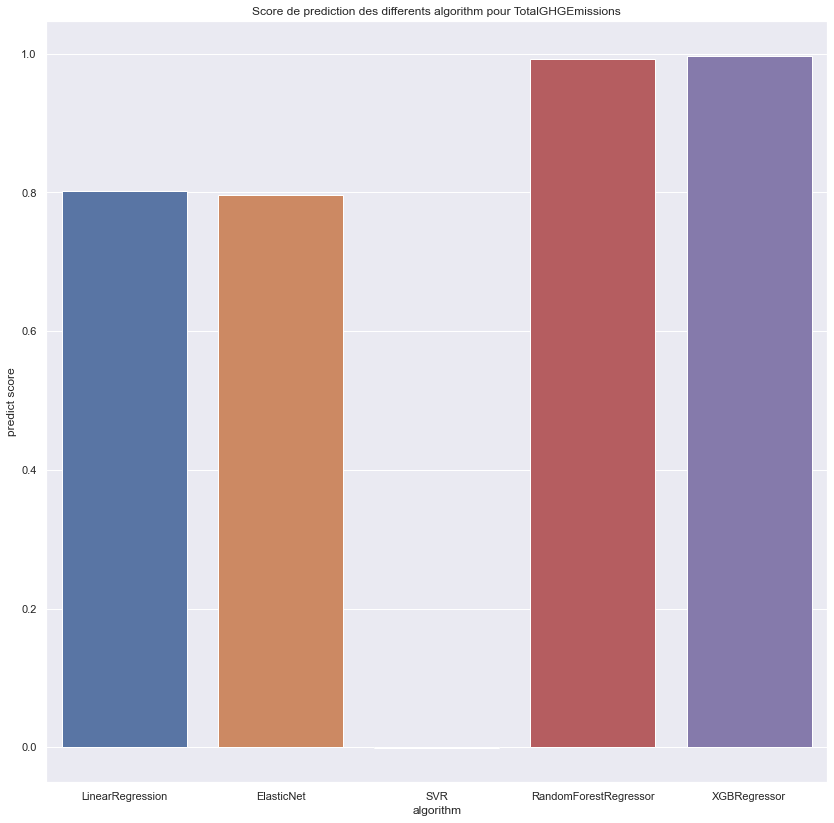

In [105]:
df_results_=df_results[df_results['column']== 'TotalGHGEmissions']
fig=plt.figure(figsize=(14,14))
sns.barplot(df_results_['algorithm'],df_results_['predict score'])
plt.title('Score de prediction des differents algorithm pour TotalGHGEmissions')


C:\Users\maido\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Score de prediction des differents algorithm pour SiteEnergyUse')

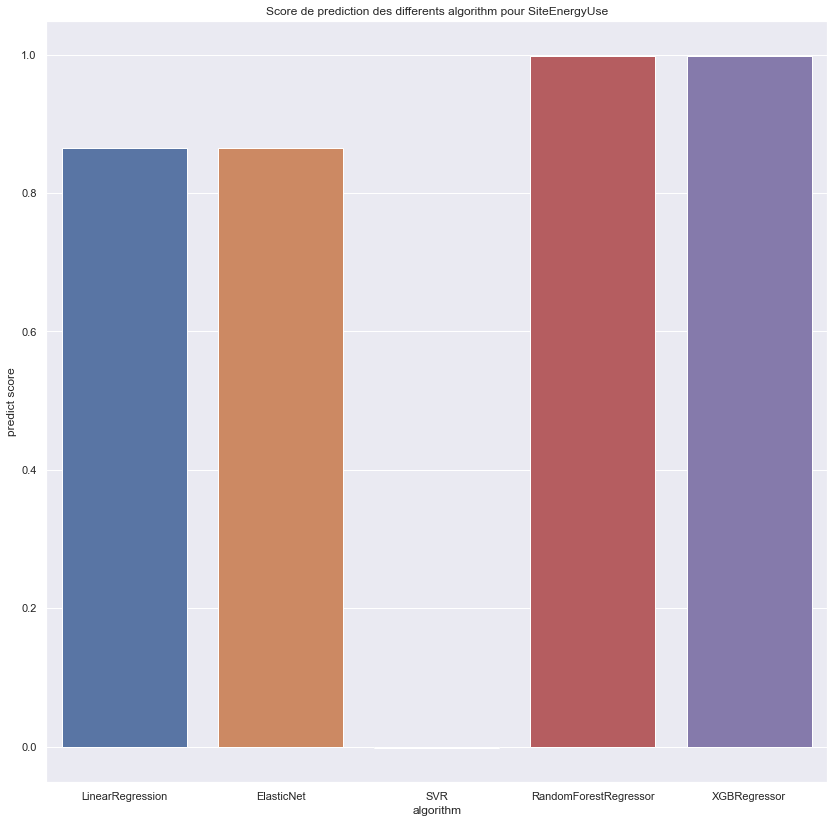

In [106]:
df_results_1=df_results[df_results['column']== 'SiteEnergyUse(kBtu)']
fig=plt.figure(figsize=(14,14))
sns.barplot(df_results_1['algorithm'],df_results_1['predict score'])
plt.title('Score de prediction des differents algorithm pour SiteEnergyUse')


Selection de variable de  TotalGHGEmissions
score prediction avant selection =0.9976747279785079, max score apres= 0.9977570583920802
RMSE avant selection =0.015086618684879706, min RMSE après= 0.014398633633130485 
nombre de features selectionnées 6 parmis 18
variable selectionnées Index(['PropertyGFATotal', 'PropertyGFABuilding(s)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity'],
      dtype='object')


C:\Users\maido\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Selection de variable de  SiteEnergyUse(kBtu)
score prediction avant selection =0.9918052215251897, max score apres= 0.9931264076896767
RMSE avant selection =0.0030505319755863526, min RMSE après= 0.0027938228007037234 
nombre de features selectionnées 8 parmis 18
variable selectionnées Index(['CouncilDistrictCode', 'PropertyGFATotal', 'PropertyGFAParking',
       'LargestPropertyUseTypeGFA', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'GHGEmissionsIntensity'],
      dtype='object')


C:\Users\maido\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


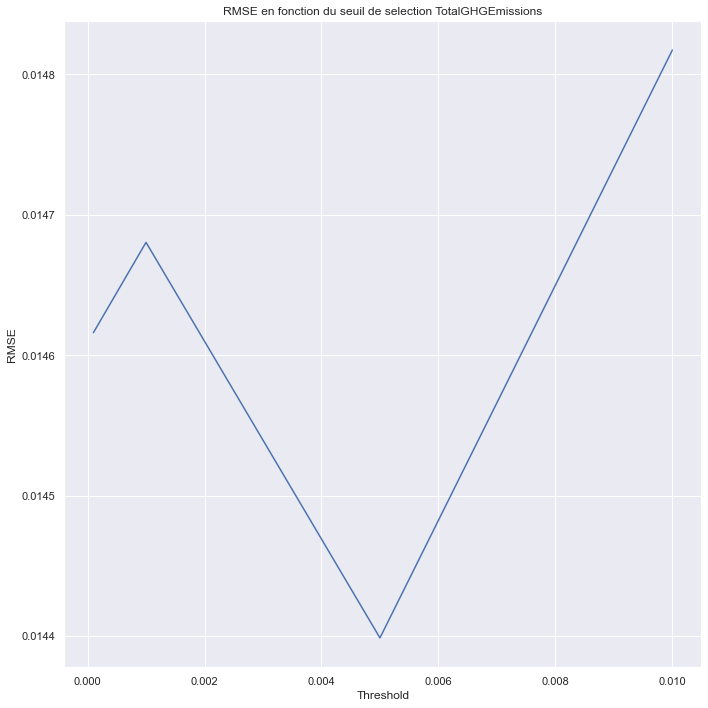

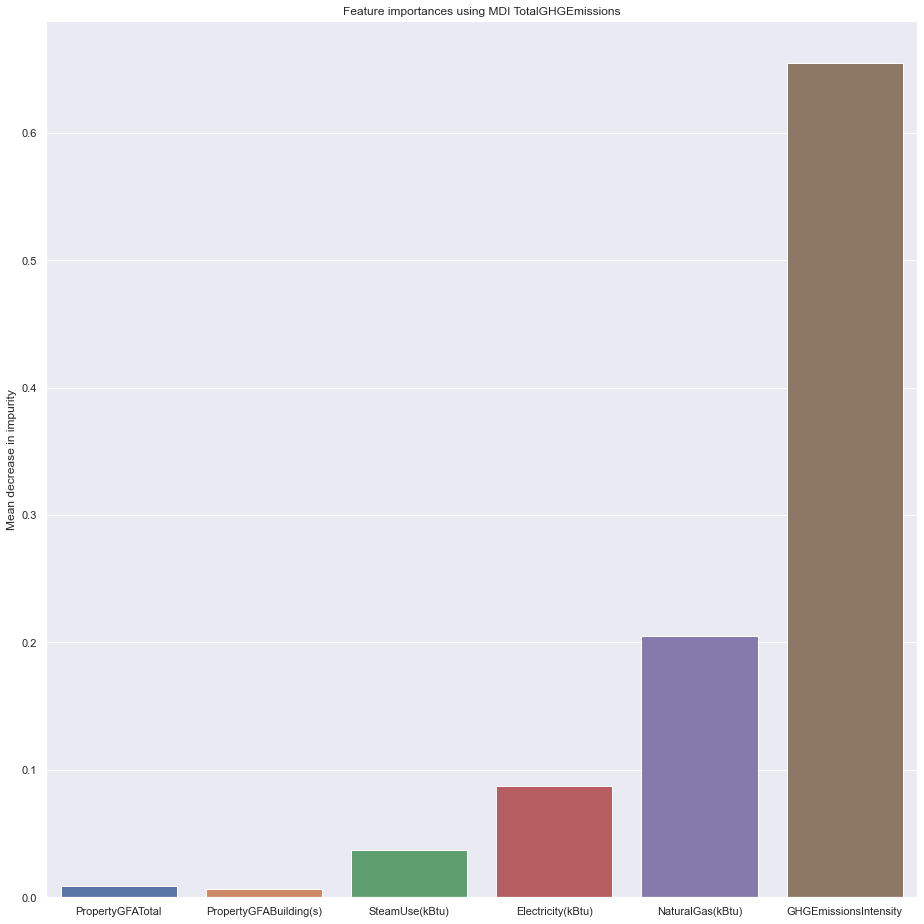

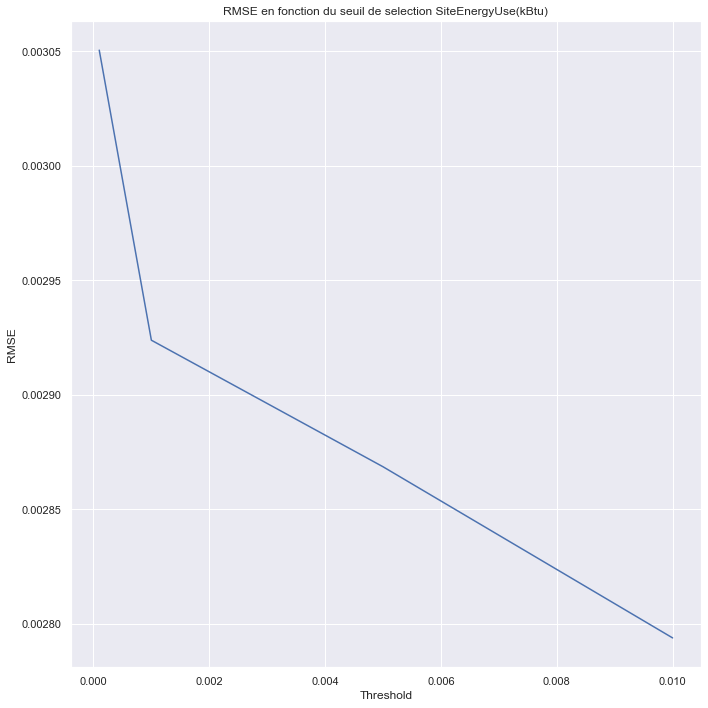

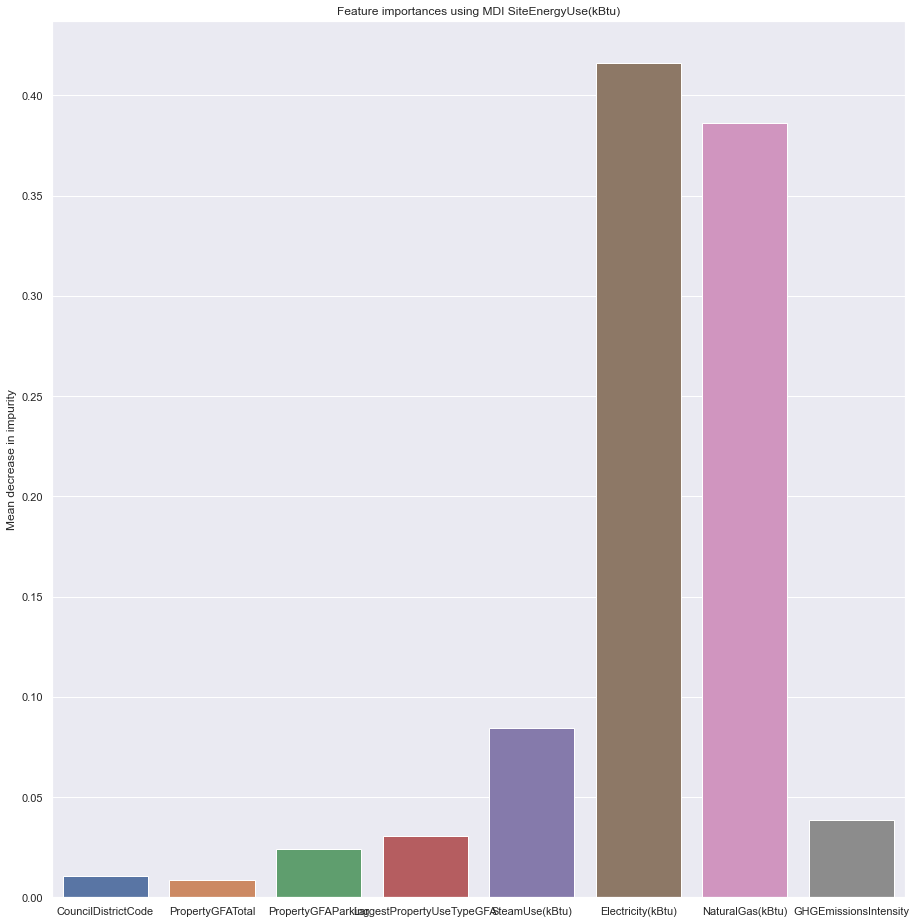

In [339]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
from sklearn.metrics import * 

for column in y_columns:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y[column], test_size=0.2) 
    
    xgb= XGBRegressor( n_estimators=300 )
    xgb.fit( Xtrain, ytrain )
    rmse= np.sqrt( mean_squared_error( ytest, xgb.predict(Xtest) ) ) 
    # rmse selon plusieurs threshold 
    rmse2= []
    #rmse.append(rmse)
    nb_var=[]
    #nb_var.append(Xtrain.shape[1])
    for seuil in [0.0001,0.001,0.005,0.01]:
        select = SelectFromModel(xgb, threshold=seuil , prefit=True )
        Xtrain2 = select.transform( Xtrain )
        Xtest2= select.transform( Xtest )
        xgb2= XGBRegressor(  n_estimators=300 )
        xgb2.fit(Xtrain2 , ytrain  )
        rmse2.append( np.sqrt( mean_squared_error( ytest, xgb2.predict( Xtest2 )))  )
    
        feature_idx = select.get_support()
        feature_name = Xtrain.columns[feature_idx]
    
        importances = xgb2.feature_importances_


#print(xgb.score(Xtest, ytest) , xgb2.score(Xtest2, ytest)   )
#print(rmse, rmse2)
#print(Xtrain.shape, Xtrain2.shape)
#print(rmse2, nb_var)
    print('Selection de variable de ',column)

    print('score prediction avant selection ={}, max score apres= {}'.format(xgb.score(Xtest, ytest) , np.max(xgb2.score(Xtest2, ytest))   ))
    print('RMSE avant selection ={}, min RMSE après= {} '.format(rmse, np.min(rmse2) ))
    print('nombre de features selectionnées {} parmis {}'.format( Xtrain2.shape[1], Xtrain.shape[1]) )
    print('variable selectionnées {}' .format(feature_name) )
    
    fig=plt.figure(figsize=(10,10))
    seuil=[0.0001,0.001,0.005,0.01]
    plt.plot(seuil, rmse2)
    plt.title("RMSE en fonction du seuil de selection {}".format(column))
    plt.ylabel("RMSE")
    plt.xlabel("Threshold")
    fig.tight_layout()

    fig=plt.figure(figsize=(13,13))
    sns.barplot(feature_name,importances)
    plt.title("Feature importances using MDI {}".format(column))
    plt.ylabel("Mean decrease in impurity")
    fig.tight_layout()